In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import re

<IPython.core.display.Javascript object>

In [3]:
def flat_list(lst):
    return [item for tup in list(lst) for item in tup]

<IPython.core.display.Javascript object>

In [4]:
def extract_scores(s):
    pattern = r"\b([A-Z0-9]+):\s+([\d.]+)\s+\(([\d.]+)\)"
    scores = {"Train Mean": [], "Train Std": [], "Test Mean": [], "Test Std": []}
    current_scores = None
    for line in s.split("\n"):
        if "[TRAIN]" in line:
            current_scores = "Train"
        elif "[TEST]" in line:
            current_scores = "Test"
        match = re.search(pattern, line)
        if match:
            score_name = match.group(1)
            score_mean = float(match.group(2))
            score_std = float(match.group(3))
            scores[f"{current_scores} Mean"].append(score_mean)
            scores[f"{current_scores} Std"].append(score_std)
    return scores

<IPython.core.display.Javascript object>

# All Cements

In [3]:
results = []

<IPython.core.display.Javascript object>

## No previous Compressive Strength

## Repeated KFold Cross validation

In [4]:
data = {
    "Metric": ["RMSE", "MAE", "MAPE", "R2"],
    "Train Mean": [],
    "Train Std": [],
    "Test Mean": [],
    "Test Std": [],
    "Validation": ["Repeated KFold"] * 4,
    "Repeats": [10] * 4,
    "Splits": [10] * 4,
}
df = pd.DataFrame(data)
df = df[
    [
        "Validation",
        "Repeats",
        "Splits",
        "Metric",
        "Train Mean",
        "Train Std",
        "Test Mean",
        "Test Std",
    ]
]
df
results.append(df)

<IPython.core.display.Javascript object>

## Blocking Time Series Split Results

In [5]:
df = [
    {
        "Validation": "Blocking Time Series Split",
        "Repeats": 10,
        "Splits": 5,
        "Metric": "RMSE",
        "Train Mean": ,
        "Train Std": ,
        "Test Mean": ,
        "Test Std": ,
    },
    {
        "Validation": "Blocking Time Series Split",
        "Repeats": 10,
        "Splits": 5,
        "Metric": "MAE",
        "Train Mean": ,
        "Train Std": ,
        "Test Mean": ,
        "Test Std": ,
    },
    {
        "Validation": "Blocking Time Series Split",
        "Repeats": 10,
        "Splits": 5,
        "Metric": "MAPE",
        "Train Mean": ,
        "Train Std": ,
        "Test Mean": ,
        "Test Std": ,
    },
    {
        "Validation": "Blocking Time Series Split",
        "Repeats": 10,
        "Splits": 5,
        "Metric": "R2",
        "Train Mean": ,
        "Train Std": ,
        "Test Mean": ,
        "Test Std": ,
    },
]

# create the dataframe
df = pd.DataFrame(df)

# set the order of the columns
df = df[
    [
        "Validation",
        "Repeats",
        "Splits",
        "Metric",
        "Train Mean",
        "Train Std",
        "Test Mean",
        "Test Std",
    ]
]

# print the dataframe
results.append(df)

<IPython.core.display.Javascript object>

## Time Series Split Cross Validation

In [6]:
# define dictionary with results
tss_results = {
    "Validation": "Time Series Split Cross Validation",
    "Repeats": 10,
    "Splits": 10,
    "RMSE Train Mean": ,
    "RMSE Train Std": ,
    "MAE Train Mean": ,
    "MAE Train Std": ,
    "MAPE Train Mean": ,
    "MAPE Train Std": ,
    "R2 Train Mean": ,
    "R2 Train Std": ,
    "RMSE Test Mean": ,
    "RMSE Test Std": ,
    "MAE Test Mean": ,
    "MAE Test Std": ,
    "MAPE Test Mean": ,
    "MAPE Test Std": ,
    "R2 Test Mean": ,
    "R2 Test Std": ,
}

# create dataframe
df = pd.DataFrame(
    columns=[
        "Validation",
        "Repeats",
        "Splits",
        "Metric",
        "Train Mean",
        "Train Std",
        "Test Mean",
        "Test Std",
    ]
)

# populate dataframe
for i, metric in enumerate(["RMSE", "MAE", "MAPE", "R2"]):
    df.loc[i * 4] = [
        tss_results["Validation"],
        tss_results["Repeats"],
        tss_results["Splits"],
        metric,
        tss_results[f"{metric} Train Mean"],
        tss_results[f"{metric} Train Std"],
        tss_results[f"{metric} Test Mean"],
        tss_results[f"{metric} Test Std"],
    ]
results.append(df)

<IPython.core.display.Javascript object>

## Blocking Time Series Split Results - Period Specific

In [5]:
s = """
******
[TRAIN]
******
RMSE: 1.782 (0.126)
MAE: 1.413 (0.095)
MAPE: 0.034 (0.002)
R2: 0.197 (0.016)

======================

******
[TEST]
******
RMSE: 2.066 (0.086)
MAE: 1.689 (0.020)
MAPE: 0.041 (0.001)
R2: 0.569 (0.635)

======================

******
[TRAIN]
******
RMSE: 1.975 (0.148)
MAE: 1.560 (0.108)
MAPE: 0.037 (0.003)
R2: 0.253 (0.095)

======================

******
[TEST]
******
RMSE: 1.680 (0.016)
MAE: 1.417 (0.055)
MAPE: 0.035 (0.001)
R2: 0.208 (0.209)

======================

******
[TRAIN]
******
RMSE: 1.797 (0.000)
MAE: 1.432 (0.000)
MAPE: 0.034 (0.000)
R2: 0.166 (0.000)

======================

******
[TEST]
******
RMSE: 1.882 (0.000)
MAE: 1.402 (0.000)
MAPE: 0.032 (0.000)
R2: 0.302 (0.000)

======================

******
[TRAIN]
******
RMSE: 1.798 (0.000)
MAE: 1.428 (0.000)
MAPE: 0.034 (0.000)
R2: 0.157 (0.000)

======================

******
[TEST]
******
RMSE: 1.850 (0.000)
MAE: 1.578 (0.000)
MAPE: 0.037 (0.000)
R2: 0.094 (0.000)

======================

******
[TRAIN]
******
RMSE: 1.800 (0.000)
MAE: 1.437 (0.000)
MAPE: 0.034 (0.000)
R2: 0.147 (0.000)

======================

******
[TEST]
******
RMSE: 24.215 (0.000)
MAE: 9.017 (0.000)
MAPE: 0.208 (0.000)
R2: 171.161 (0.000)

======================

******
[TRAIN]
******
RMSE: 1.899 (0.000)
MAE: 1.523 (0.000)
MAPE: 0.036 (0.000)
R2: 0.147 (0.000)

======================

******
[TEST]
******
RMSE: 3.059 (0.000)
MAE: 2.525 (0.000)
MAPE: 0.066 (0.000)
R2: 0.901 (0.000)

======================
"""

<IPython.core.display.Javascript object>

In [7]:
# Define the train and test periods for each row
periods = [
    ["6 months", "One Month"],
    ["11 months", "One Month"],
    ["1 year", "One Month"],
    ["1 year and one month", "One Month"],
    ["1 year and two months", "One Month"],
    ["1 year and 7 months and 18 days", "4 months and 27 days"],
]

# Extract the relevant information and store it in a dictionary
data = {
    "Validation": ["Blocking Time Series - Period Specific"] * 24,
    "Repeats": [1] * 24,
    "Splits": [1] * 24,
    "Metric": ["RMSE", "MAE", "MAPE", "R2"] * len(periods),
    "Train Mean": [],
    "Train Std": [],
    "Test Mean": [],
    "Test Std": [],
    "Train Period": [
        item for sublist in [[result[0]] * 4 for result in periods] for item in sublist
    ],
    "Test Period": [
        item for sublist in [[result[1]] * 4 for result in periods] for item in sublist
    ],
}

scores = extract_scores(s)

data["Train Mean"] = scores["Train Mean"]
data["Train Std"] = scores["Train Std"]
data["Test Mean"] = scores["Test Mean"]
data["Test Std"] = scores["Test Std"]

df = pd.DataFrame(data)

<IPython.core.display.Javascript object>

In [8]:
df = df.set_index(["Train Period", "Test Period"])
df[
    (
        df[df["Metric"] == "RMSE"]
        == df[df["Metric"] == "RMSE"][["Test Mean"]].min().values[0]
    )["Test Mean"]
]

/home/felipe/Documents/ccs28-venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Validation  Repeats  \
Train Period Test Period                                                    
11 months    One Month    Blocking Time Series - Period Specific        1   
             One Month    Blocking Time Series - Period Specific        1   
             One Month    Blocking Time Series - Period Specific        1   
             One Month    Blocking Time Series - Period Specific        1   

                          Splits Metric  Train Mean  Train Std  Test Mean  \
Train Period Test Period                                                    
11 months    One Month         1   RMSE       1.975      0.148      1.680   
             One Month         1    MAE       1.560      0.108      1.417   
             One Month         1   MAPE       0.037      0.003      0.035   
             One Month         1     R2       0.253      0.095      0.208   

                          Test Std  
Train Period Test Period            
11 months    One Month       0.016  
             One Month       0.055  
             One Month       0.001  
             One Month       0.209

<IPython.core.display.Javascript object>

# Reports

## Definitions

In [9]:
# Linear Algebra
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# Model Selection
from sklearn.model_selection import train_test_split

# Pipeline
from sklearn.pipeline import Pipeline

# Modeling
from sklearn.linear_model import LinearRegression

# Processing
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

<IPython.core.display.Javascript object>

In [10]:
def repeated_blocking_time_series(
    Estimator, Transform, x, y, train_period, test_period, repeats=10, params=None
):
    models = []
    results = []
    max_samples = x.shape[0]
    y_results = []
    for _ in range(repeats):
        i = 0
        scores = []
        for _ in range(0, max_samples // (train_period + test_period)):
            scaler = Transform()
            model = Estimator() if params is None else Estimator(**params)
            x_train = x[i : i + train_period]
            y_train = y[i : i + train_period]
            x_test = x[i + train_period : i + train_period + test_period]
            y_test = y[i + train_period : i + train_period + test_period]
            x_train = scaler.fit_transform(x_train)
            x_test = scaler.transform(x_test)

            model.fit(x_train, y_train)

            y_train_pred = model.predict(x_train)
            y_test_pred = model.predict(x_test)
            y_results.append(y_test_pred)
            scores.append(
                score_regression_metrics(y_train, y_train_pred, y_test, y_test_pred)
            )
            i += train_period + test_period
            models.append(model)

        scores_final = {key: [] for key, _ in scores[0].items()}
        for scores_dict in scores:
            for key, value in scores_dict.items():
                scores_final[key] += [value]
        results.append(scores_final)
    return results, y_results, models

<IPython.core.display.Javascript object>

In [11]:
def print_scores(scores, METRICS, METRICS_DICT):
    for phase in ["train", "test"]:
        print("******")
        print(f"[{phase.upper()}]")
        print("******")
        for metric in METRICS:
            name = METRICS_DICT[metric]
            print(
                f"{name}: %.3f (%.3f)"
                % (
                    np.abs(np.mean(scores[f"{phase}_" + metric])),
                    np.std(scores[f"{phase}_" + metric]),
                )
            )
        print("\n======================\n")

<IPython.core.display.Javascript object>

In [12]:
def score_regression_metrics(y_train, y_train_pred, y_test, y_test_pred):
    TRAIN_RMSE = mean_squared_error(y_true=y_train, y_pred=y_train_pred, squared=False)
    TRAIN_MAE = mean_absolute_error(y_true=y_train, y_pred=y_train_pred)
    TRAIN_MAPE = mean_absolute_percentage_error(y_true=y_train, y_pred=y_train_pred)
    TRAIN_R2 = r2_score(y_true=y_train, y_pred=y_train_pred)

    TEST_RMSE = mean_squared_error(y_true=y_test, y_pred=y_test_pred, squared=False)
    TEST_MAE = mean_absolute_error(y_true=y_test, y_pred=y_test_pred)
    TEST_MAPE = mean_absolute_percentage_error(y_true=y_test, y_pred=y_test_pred)
    TEST_R2 = r2_score(y_true=y_test, y_pred=y_test_pred)

    scores = {
        "train_neg_root_mean_squared_error": TRAIN_RMSE,
        "train_neg_mean_absolute_error": TRAIN_MAE,
        "train_neg_mean_absolute_percentage_error": TRAIN_MAPE,
        "train_r2": TRAIN_R2,
        "test_neg_root_mean_squared_error": TEST_RMSE,
        "test_neg_mean_absolute_error": TEST_MAE,
        "test_neg_mean_absolute_percentage_error": TEST_MAPE,
        "test_r2": TEST_R2,
    }
    return scores

<IPython.core.display.Javascript object>

In [13]:
SEED = 47
METRICS = (
    "neg_root_mean_squared_error",
    "neg_mean_absolute_error",
    "neg_mean_absolute_percentage_error",
    "r2",
)
METRICS_DICT = {
    "neg_root_mean_squared_error": "RMSE",
    "neg_mean_absolute_error": "MAE",
    "neg_mean_absolute_percentage_error": "MAPE",
    "r2": "R2",
}

<IPython.core.display.Javascript object>

## Reading the dataset

In [62]:
df = pd.read_csv("../../../../../../data/processed/partner_ii/Type-I-II.csv")

<IPython.core.display.Javascript object>

## 1. Dataset: df_no_cs

In this dataset the CS1, CS3 and CS7 variables are not considered. 

In [63]:
df_no_cs = df.drop(
    ["strength_1d", "strength_3d", "strength_7d"],
    axis=1,
).copy()

y = df_no_cs.pop("strength_28d").values
x = df_no_cs.drop(["sample_date"], axis=1)

<IPython.core.display.Javascript object>

## Train 11 months and predicts one month every year

In [64]:
scores, y_results, models = repeated_blocking_time_series(
    LinearRegression,
    StandardScaler,
    x,
    y,
    train_period=330,
    test_period=30,
    repeats=1,
)

print_scores(scores[0], METRICS, METRICS_DICT)

******
[TRAIN]
******
RMSE: 1.975 (0.148)
MAE: 1.560 (0.108)
MAPE: 0.037 (0.003)
R2: 0.253 (0.095)


******
[TEST]
******
RMSE: 1.680 (0.016)
MAE: 1.417 (0.055)
MAPE: 0.035 (0.001)
R2: 0.208 (0.209)




<IPython.core.display.Javascript object>

### Plotting of predicitons

In [65]:
y_results_mean = np.mean(y_results, axis=0)
# y_hat = y_results_mean.squeeze().squeeze().squeeze()
y_hat = y_results

df["sample_date"] = pd.to_datetime(pd.to_datetime(df["sample_date"]).dt.date)

start = 330
step = 30
indices_start = [i for i in range(start, x.shape[0], start + step)]

index = [df["sample_date"][start : start + step].values for start in indices_start]

results_str = """           Mean  (std)
RMSE: 1.680 (0.016)
MAE:   1.417 (0.055)
MAPE: 0.035 (0.001)
R2:     0.208 (0.209)
"""

df = df.rename(
    {"sample_date": "Date", "strength_28d": "28 day Compressive strength"}, axis=1
)

<IPython.core.display.Javascript object>

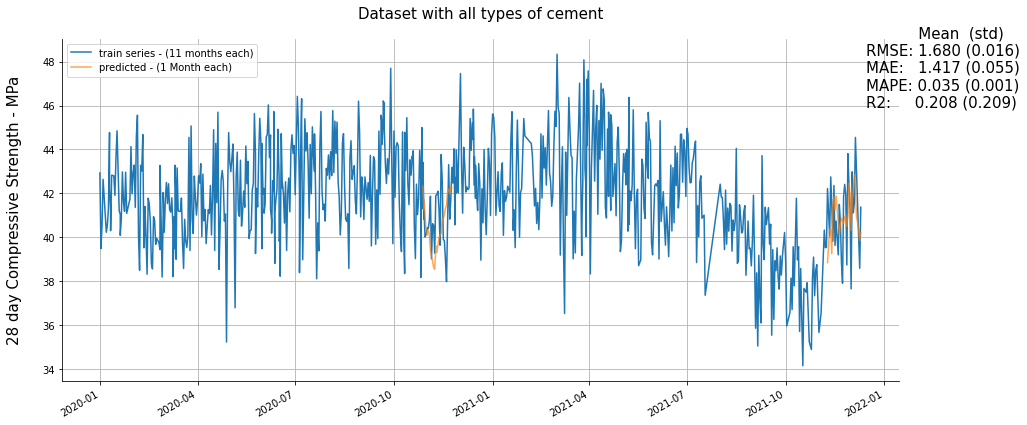

<IPython.core.display.Javascript object>

In [67]:
tmp = df[["Date", "28 day Compressive strength"]].dropna().copy()
tmp["Date"] = pd.to_datetime(tmp["Date"])
tmp = tmp.rename({"Production": "Date"}, axis=1)
tmp = tmp.set_index("Date")
tmp = tmp.iloc[: (start + step) * 2]

pred_series_0 = y_hat[0]
pred_series_0 = pd.DataFrame(
    {"ccs28-pred": pred_series_0}, index=pd.to_datetime(index[0])
)

pred_series_1 = y_hat[1]
pred_series_1 = pd.DataFrame(
    {"ccs28-pred": pred_series_1}, index=pd.to_datetime(index[1])
)

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))

tmp.plot(ax=ax)
pred_series_0.plot(ax=ax, color="C1", alpha=0.7)
pred_series_1.plot(ax=ax, color="C1", alpha=0.7)

ax.grid(which="both")
ax.legend(["28 day compressive strength"], loc="upper left")

# ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_xlabel("", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# ax.axvline(pred_series_0.index[0], color="r")  # end of train dataset
# ax.axvline(pred_series_1.index[0], color="r")  # end of train dataset

ax.legend(
    ["train series - (11 months each)", "predicted - (1 Month each)"], loc="upper left"
)  # loc="upper left")

# ax.set_xlabel("Trains a year and a month and predict a month for each year", labelpad=20, fontsize=15)
ax.set_ylabel("28 day Compressive Strength - MPa", labelpad=20, fontsize=15)

ax.text(
    pred_series_1.index[-1] + pd.DateOffset(5),
    45,
    results_str,
    fontsize=15,
    verticalalignment="bottom",
    horizontalalignment="left",
    # multialignment="center",
    # fontweight="ultrabold"
)

ax.set_title("Dataset with all types of cement", fontsize=15, pad=20)

plt.show()

## Feature Importance

In [70]:
df = (
    pd.DataFrame(
        {
            "Models": ["Model 1"] * len(x.columns) + ["Model 2"] * len(x.columns),
            "Var": x.columns.to_list() + x.columns.to_list(),
            "Coeficient": models[0].coef_.tolist() + models[1].coef_.tolist(),
            "Intercept": [models[0].intercept_] * len(x.columns)
            + [models[1].intercept_] * len(x.columns),
        },
    )
    .groupby(["Models", "Var"])
    .max()
)

<IPython.core.display.Javascript object>

In [71]:
df.to_excel("Partner_II.xlsx")

<IPython.core.display.Javascript object>

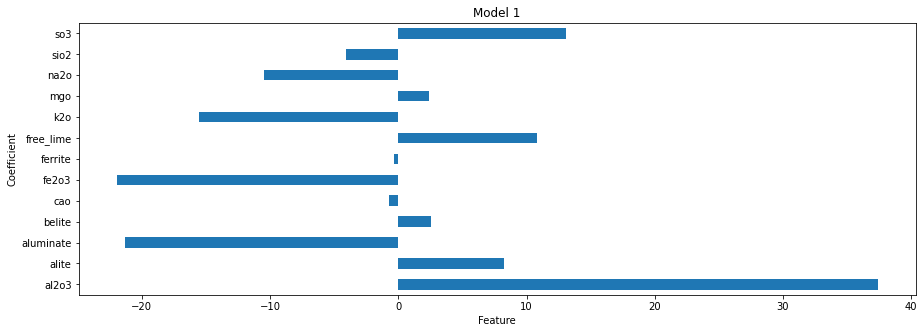

<IPython.core.display.Javascript object>

In [96]:
df.loc["Model 1"]["Coeficient"].plot(kind="barh", figsize=(15, 5), title="Model 1")

plt.xlabel("Feature")
plt.ylabel("Coefficient")

plt.show()

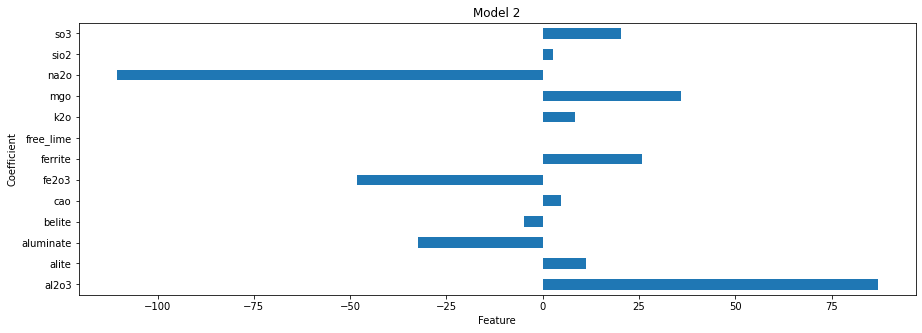

<IPython.core.display.Javascript object>

In [98]:
df.loc["Model 2"]["Coeficient"].plot(kind="barh", figsize=(15, 5), title="Model 2")

plt.xlabel("Feature")
plt.ylabel("Coefficient")

plt.show()